170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 - 12s - 7ms/step - accuracy: 0.4374 - loss: 1.5427 - val_accuracy: 0.5496 - val_loss: 1.2617
Epoch 2/10
1563/1563 - 4s - 2ms/step - accuracy: 0.5871 - loss: 1.1687 - val_accuracy: 0.5861 - val_loss: 1.1795
Epoch 3/10
1563/1563 - 4s - 2ms/step - accuracy: 0.6391 - loss: 1.0230 - val_accuracy: 0.6408 - val_loss: 1.0352
Epoch 4/10
1563/1563 - 6s - 4ms/step - accuracy: 0.6769 - loss: 0.9207 - val_accuracy: 0.6720 - val_loss: 0.9456
Epoch 5/10
1563/1563 - 4s - 3ms/step - accuracy: 0.7015 - loss: 0.8481 - val_accuracy: 0.6870 - val_loss: 0.8997
Epoch 6/10
1563/1563 - 4s - 2ms/step - accuracy: 0.7230 - loss: 0.7877 - val_accuracy: 0.6823 - val_loss: 0.9073
Epoch 7/10
1563/1563 - 5s - 3ms/step - accuracy: 0.7405 - loss: 0.7385 - val_accuracy: 0.6918 - val_loss: 0.8960
Epoch 8/10
1563/1563 - 4s - 3ms/step - accuracy: 0.7552 - loss: 0.6950 - val_accuracy: 0.7015 - val_loss: 0.8683
Epoch 9/10
1563/1563 - 5s - 3ms/step - accuracy: 0.7697 - loss: 0.6539 - val_accuracy: 0.7161 -

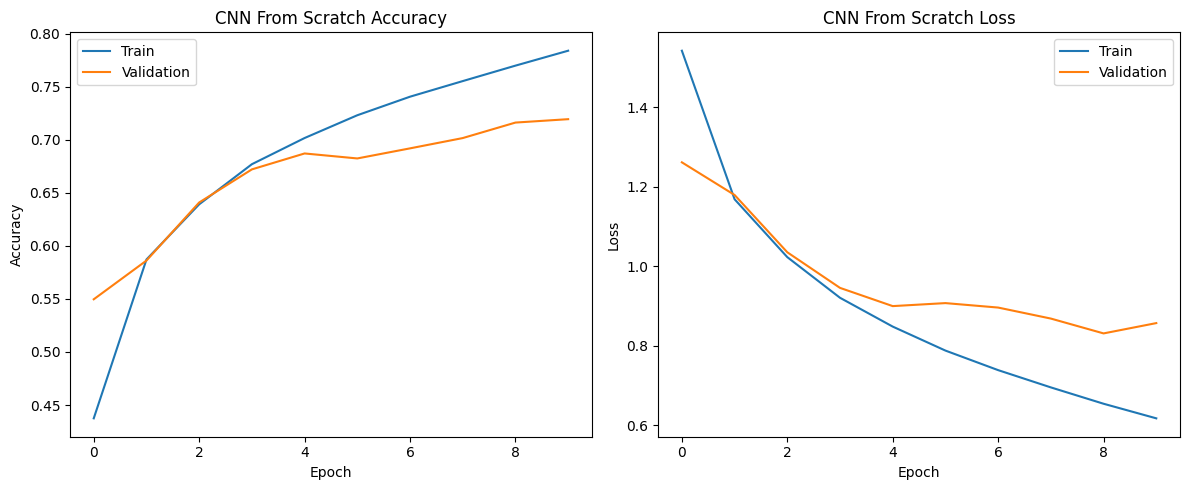

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1563/1563 - 19s - 12ms/step - accuracy: 0.5222 - loss: 1.3677 - val_accuracy: 0.5682 - val_loss: 1.2347
Epoch 2/10
1563/1563 - 15s - 9ms/step - accuracy: 0.5850 - loss: 1.1880 - val_accuracy: 0.5752 - val_loss: 1.2072
Epoch 3/10
1563/1563 - 20s - 13ms/step - accuracy: 0.6050 - loss: 1.1305 - val_accuracy: 0.5832 - val_loss: 1.1721
Epoch 4/10
1563/1563 - 12s - 8ms/step - accuracy: 0.6198 - loss: 1.0899 - val_accuracy: 0.5866 - val_loss: 1.1926
Epoch 5/10
1563/1563 - 21s - 13ms/step - accuracy: 0.6306 - loss: 1.0554 - val_accuracy: 0.5938 - val_loss: 1.1503
Epoch 6/10
1563/1563 - 21s - 13ms/step - accuracy: 0.6415 - loss: 1.0246 - val_accuracy: 0.6057 - val_loss: 1.1215
Epoch 7/10
1563/1563 - 12s - 8ms/step - accuracy: 0.6506 - loss: 0.9978 - val_accuracy: 0.6027 - val_loss: 1.1310
Epoch 8/10
1563/1563 - 12s - 8ms/step - accuracy: 0.6598 - loss: 0.9725 - val_accuracy: 0.6092 - val_loss: 1.1231
Epoch 9/10
1563/1563 - 12s - 8ms/

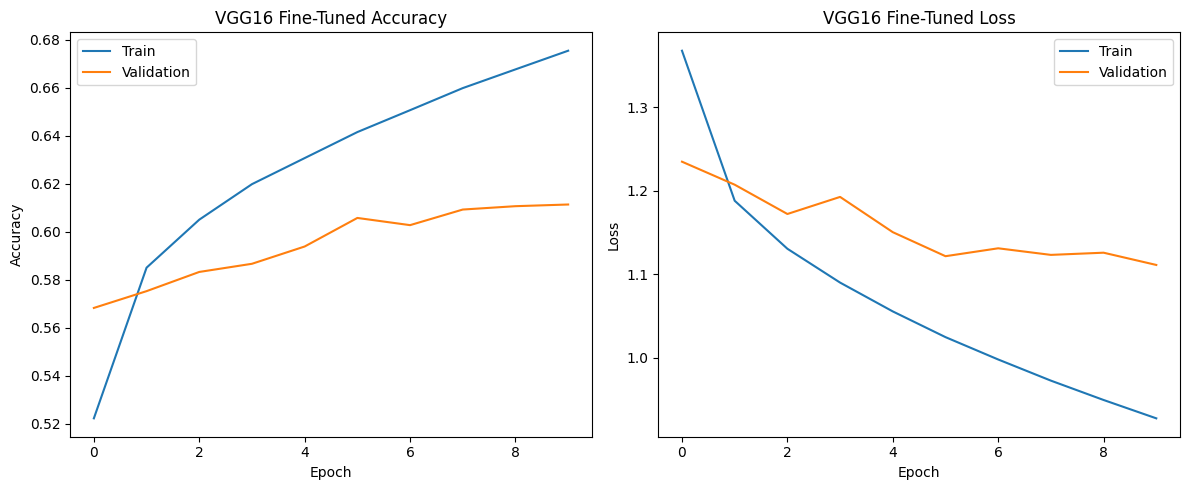

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

def preprocess_data():
    (train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
    train_images, test_images = train_images / 255.0, test_images / 255.0
    return train_images, test_images, to_categorical(train_labels), to_categorical(test_labels)

def plot_history(history, title_prefix):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'{title_prefix} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'{title_prefix} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

def cnn_from_scratch():
    train_images, test_images, train_labels, test_labels = preprocess_data()

    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D(2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2)
    print(f"Test Accuracy (from scratch): {model.evaluate(test_images, test_labels, verbose=0)[1]:.4f}")
    plot_history(history, "CNN From Scratch")

def vgg16_fine_tuning():
    train_images, test_images, train_labels, test_labels = preprocess_data()

    vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    vgg_base.trainable = False

    model = models.Sequential([
        vgg_base,
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2)
    print(f"Test Accuracy (VGG16 Fine-Tuned): {model.evaluate(test_images, test_labels, verbose=0)[1]:.4f}")
    plot_history(history, "VGG16 Fine-Tuned")

cnn_from_scratch()
vgg16_fine_tuning()
